# Example development notebook for `app_predict`

Related wiki page:  
https://github.com/stharrold/demo/wiki/app_predict

In [2]:
cd /opt/demo

/opt/demo


In [2]:
# Import standard packages.
import os
import sys
import time
# Import installed packages.
# Import local packages.
sys.path.insert(0, os.path.join(os.path.curdir, r'demo'))
%reload_ext autoreload
%autoreload 2
import demo
%matplotlib inline

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
print("Timestamp:")
print(time.strftime(r'%Y-%m-%dT%H:%M:%S%Z', time.gmtime()))
print()
print("Versions:")
print("Python:", sys.version_info)
print("demo:", demo.__version__)

Timestamp:
2017-02-24T15:17:23GMT

Versions:
Python: sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)
demo: 0.0.0


In [4]:
!py.test -v --pdb

============================= test session starts ==============================
platform linux -- Python 3.5.2, pytest-2.9.2, py-1.4.31, pluggy-0.3.1 -- /opt/conda/bin/python
cachedir: .cache
rootdir: /opt/demo, inifile: 
collected 8 items 

tests/test__init__.py::test__all__ PASSED
tests/test__init__.py::test__version__ PASSED
tests/test_app_template/test_app_template__init__.py::test__all__ PASSED
tests/test_app_template/test_app_template_main.py::test__all__ PASSED
tests/test_app_template/test_app_template_main.py::test_main PASSED
tests/test_app_template/test_app_template_main.py::test__main__ PASSED
tests/test_app_template/test_template.py::test_prepend_this PASSED
tests/test_utils/test_utils__init__.py::test__all__ PASSED

=========================== 8 passed in 4.68 seconds ===========================


# Development below

## Initialization

### Imports

In [3]:
cd /opt/demo

/opt/demo


In [64]:
# Import standard packages.
import bs4
import collections
import glob
import io
import os
import pickle
import requests
import subprocess
import sys
import time
import warnings
# Import installed packages.
import geopy
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import sklearn as sk
import sklearn.cross_validation as sk_cv
import sklearn.cluster as sk_cl
import sklearn.decomposition as sk_dc
import sklearn.ensemble as sk_ens
import sklearn.metrics as sk_met
import sklearn.preprocessing as sk_pre
# Import local packages.
# datascience version: TODO link to GitHub tag v0.0.1.
sys.path.insert(0, os.path.join(os.path.curdir, r'demo'))
%reload_ext autoreload
%autoreload 2
import demo
%matplotlib inline

In [5]:
print("Timestamp:")
print(time.strftime(r'%Y-%m-%dT%H:%M:%S%Z', time.gmtime()))
print()
print("Versions:")
print("Python:", sys.version_info)
print("matplotlib:", mpl.__version__)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scipy:", scipy.__version__)
print("sklearn:", sk.__version__)
print("seaborn:", sns.__version__)
print("demo:", demo.__version__)

Timestamp:
2017-02-24T21:26:10GMT

Versions:
Python: sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)
matplotlib: 1.5.1
numpy: 1.11.1
pandas: 0.18.1
scipy: 0.17.1
sklearn: 0.17.1
seaborn: 0.7.1
demo: 0.0.0


In [18]:
os.path.abspath(os.path.curdir)

'/opt/demo'

In [19]:
# State settings.
sns.set() # Set matplot lib styles with seaborn
np.random.seed(seed=1) # Set random state for reproducibility.

# File paths
path_data_dir = os.path.join(os.path.abspath(os.path.curdir), r'demo/app_predict/data')
path_csv = os.path.join(path_data_dir, r'Risky Dealer Case Study Transactions.csv')

# Statistics
# percentiles = [-1.6449 sigma, -1 sigma, mean, +1 sigma, +1.6449 sigma] for normal distribution
# 90.00% confidence interval = (percentiles[0], percentiles[-1])
# 68.27% confidence interval = (percentiles[1], percentiles[-2])
# median = percentiles[2]
percentiles = [0.0500, 0.1587, 0.5000, 0.8413, 0.9500]

## Extract, transform, and load

In [21]:
print(r"""`df`: Load and format sales transactions.""")
df = pd.read_csv(path_csv)

In [23]:
df.head()

,BuyerID,SellerID,Mileage,VIN,SellingLocation,CarMake,SalePrice,CarYear,MMR,JDPowersCat,...,Salvage,OVE,Simulcast,InLane,PSIEligible,SaleDate,Autocheck_score,ConditionReport,DSEligible,Returned
0,351757,441081,37055,1FAHP3M27CL374352,CAAI,FORD,13000,2012,13050,COMPACT CAR,...,0,0,0,0,1,13-07-25,1.000000,NaN,1,0.0
1,351757,442235,248,1G1JE6SB7D4103706,DETA,CHEVROLET,13900,2013,13600,COMPACT CAR,...,0,0,0,0,1,13-10-24,NaN,NaN,1,NaN
2,351757,436280,39627,1G1PG5SC4C7102274,CAAI,CHEVROLET,13800,2012,14050,MIDSIZE CAR,...,0,0,0,1,1,13-04-18,-2.666667,41,1,NaN
3,351757,436280,50773,1G1PG5SC5C7113820,CAAI,CHEVROLET,12900,2012,13150,MIDSIZE CAR,...,0,0,0,1,1,13-04-18,1.000000,31,1,NaN
4,351757,434202,54133,1GNKVGED4BJ301146,SVAA,CHEVROLET,17800,2011,18050,SUV,...,0,0,0,1,1,13-02-26,-1.400000,34,1,NaN


## Exploratory data analysis

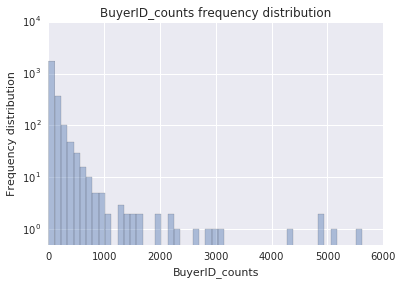

In [147]:
# BuyerID, BuyerId_counts
# Cast BuyerID to string.
df['BuyerID'] = df['BuyerID'].astype(str)
# Plot frequency distrbution and save as feature.
buyerid_counts = collections.Counter(df['BuyerID'].values)
df['BuyerID_counts'] = df['BuyerID'].map(buyerid_counts)
sns.distplot(list(buyerid_counts.values()), hist=True, kde=False, norm_hist=False)
plt.title('BuyerID_counts frequency distribution')
plt.xlabel('BuyerID_counts')
plt.ylabel('Frequency distribution')
plt.yscale('log')
plt.ylim(ymin=0.5)
plt.show()

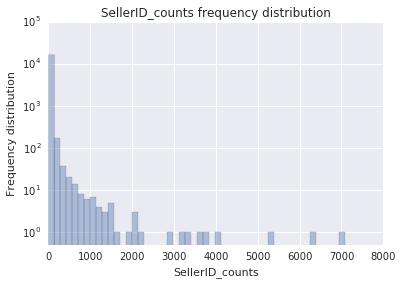

In [148]:
# SellerID, SellerID_counts
# Cast SellerID to string.
df['SellerID'] = df['SellerID'].astype(str)
# Plot frequency distrbution and save as feature.
sellerid_counts = collections.Counter(df['SellerID'].values)
df['SellerID_counts'] = df['SellerID'].map(sellerid_counts)
sns.distplot(list(sellerid_counts.values()), hist=True, kde=False, norm_hist=False)
plt.title('SellerID_counts frequency distribution')
plt.xlabel('SellerID_counts')
plt.ylabel('Frequency distribution')
plt.yscale('log')
plt.ylim(ymin=0.5)
plt.show()

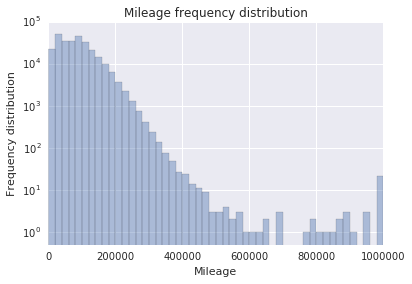

In [134]:
# Mileage
# Plot frequency distribution.
sns.distplot(df['Mileage'].values, hist=True, kde=False, norm_hist=False)
plt.title('Mileage frequency distribution')
plt.xlabel('Mileage')
plt.ylabel('Frequency distribution')
plt.yscale('log')
plt.ylim(ymin=0.5)
plt.show()

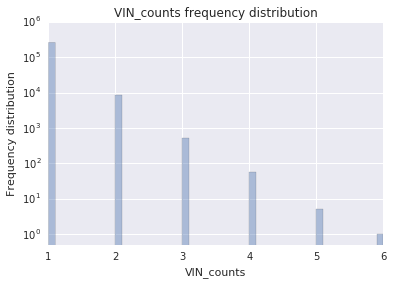

In [135]:
# VIN, VIN_counts
vin_counts = collections.Counter(df['VIN'].values)
df['VIN_counts'] = df['VIN'].map(vin_counts)
sns.distplot(list(vin_counts.values()), hist=True, kde=False, norm_hist=False)
plt.title('VIN_counts frequency distribution')
plt.xlabel('VIN_counts')
plt.ylabel('Frequency distribution')
plt.yscale('log')
plt.ylim(ymin=0.5)
plt.show()

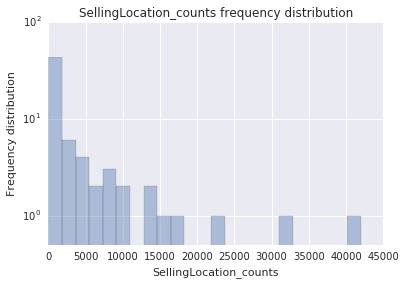

In [140]:
# SellingLocation, SellingLocation_counts, SellingLocation_lat, SellingLocation_lon
# Cell takes ~1 min to execute.

# Extract counts.
sellloc_counts = collections.Counter(df['SellingLocation'].values)
df['SellingLocation_counts'] = df['SellingLocation'].map(sellloc_counts)
sns.distplot(list(sellloc_counts.values()), hist=True, kde=False, norm_hist=False)
plt.title('SellingLocation_counts frequency distribution')
plt.xlabel('SellingLocation_counts')
plt.ylabel('Frequency distribution')
plt.yscale('log')
plt.ylim(ymin=0.5)
plt.show()

# Scrape webpages for first address to match SellingLocation code.
sellloc_geoloc = dict()
seconds_per_query = 1.0/5.0 # Google API limit
for loc in df['SellingLocation'].unique():
    url = r'https://www.manheim.com/locations/{loc}/events'.format(loc=loc)
    page = requests.get(url)
    tree = bs4.BeautifulSoup(page.text, 'lxml')
    addresses = tree.find(name='p', class_='loc_address')
    try:
        if len(addresses) == 0:
            raise IOError("No address found on page.")
        address = addresses[0].get_text().strip()
        zipcode = address.split()[-1]
        location = geopy.geocoders.GoogleV3().geocode(
            query=address, exactly_one=True,
            components=dict(country='United States', postal_code=zipcode))
    except:
        warnings.warn(textwrap.dedent("""\
            Exception raised. Setting {loc} geo location to `None`
            sys.exc_info() =
            {exc}""".format(loc=loc, exc=sys.exc_info())))
        location = None
    sellloc_geoloc[loc] = location
    time.sleep(seconds_per_query)
# Map SellingLocation codes to latitude, longitude coordinates.
sellloc_lat = {
    sellloc: (geoloc.latitude if geoloc is not None else 0.0)
    for (sellloc, geoloc) in sellloc_geoloc.items()}
sellloc_lon = {
    sellloc: (geoloc.longitude if geoloc is not None else 0.0)
    for (sellloc, geoloc) in sellloc_geoloc.items()}
df['SellingLocation_lat'] = df['SellingLocation'].map(sellloc_lat)
df['SellingLocation_lon'] = df['SellingLocation'].map(sellloc_lon)

In [153]:
# CarMake, one-hot encoding
len(df['CarMake'].unique()), len(df)

(201, 278337)

In [168]:
pd.fill isnull(df['CarMake'])

True

In [163]:
list(df['CarMake'].fillna(.str.replace(' ', '').unique())

['FORD',
 'CHEVROLET',
 'NISSAN',
 'VOLKSWAGEN',
 'DODGE',
 'SUBARU',
 'TOYOTA',
 'HYUNDAI',
 'BMW',
 'KIA',
 'ACURA',
 'MAZDA',
 'MINI',
 'HONDA',
 'LEXUS',
 'INFINITI',
 'MERCEDES-BENZ',
 'VOLVO',
 'JEEP',
 'RAM',
 'PONTIAC',
 'BUICK',
 'CADILLAC',
 'GMC',
 'CHRYSLER',
 'HUMMER',
 'LINCOLN',
 'SCION',
 'AUDI',
 'HARLEYDAVIDSON',
 'FIAT',
 'MERCURY',
 'MITSUBISHI',
 'SUZUKI',
 'JAGUAR',
 'LANDROVER',
 'BENTLEY',
 'LOTUS',
 'PORSCHE',
 'MASERATI',
 'SATURN',
 'ISUZU',
 'SAAB',
 'OLDSMOBILE',
 'ASTONMARTIN',
 'FERRARI',
 'SMART',
 'MERCEDES',
 'YAMAHA',
 'PANOZ',
 'FISKER',
 'GEO',
 'FREIGHTLINER',
 'INTERNATIONAL',
 'PETERBILT',
 'SETRA',
 'JOHNDEERE',
 'AMGENERAL',
 'FREIGHTLI',
 nan,
 'FREEDOM',
 'MONACO',
 'FLEETWOOD',
 'DAMON',
 'DOLITTLE',
 'KAWASAKI',
 'WINNEBAGO',
 'FCCOMMER',
 'FURO',
 'INTERNATIO',
 'XINTERNATI',
 'TRAILMASTER',
 'LAMAR',
 'CANAM',
 'TITAN',
 'FREIGHTLIN',
 'INTERNATL',
 'KIT',
 'VIKING',
 'THOR',
 'ITACSA',
 'GULFSTREAM',
 'DYNAMAX',
 'JAYCO',
 'COACHMEN',
 '

In [149]:
df.dtypes

BuyerID                    object
SellerID                   object
Mileage                     int64
VIN                        object
SellingLocation            object
CarMake                    object
SalePrice                   int64
CarYear                     int64
MMR                         int64
JDPowersCat                object
LIGHTG                      int64
LIGHTY                      int64
LIGHTR                      int64
PSI                         int64
Arbitrated                  int64
Salvage                     int64
OVE                         int64
Simulcast                   int64
InLane                      int64
PSIEligible                 int64
SaleDate                   object
Autocheck_score           float64
ConditionReport            object
DSEligible                  int64
Returned                  float64
SellingLocation_lat       float64
SellingLocation_lon       float64
BuyerID_counts              int64
SellerID_counts             int64
VIN_counts    

In [154]:
df['CarMake']

0                  FORD
1             CHEVROLET
2             CHEVROLET
3             CHEVROLET
4             CHEVROLET
5             CHEVROLET
6             CHEVROLET
7             CHEVROLET
8             CHEVROLET
9             CHEVROLET
10               NISSAN
11           VOLKSWAGEN
12           VOLKSWAGEN
13                DODGE
14                DODGE
15            CHEVROLET
16            CHEVROLET
17            CHEVROLET
18                DODGE
19            CHEVROLET
20            CHEVROLET
21            CHEVROLET
22            CHEVROLET
23            CHEVROLET
24            CHEVROLET
25            CHEVROLET
26           VOLKSWAGEN
27           VOLKSWAGEN
28           VOLKSWAGEN
29               SUBARU
              ...      
278307            DODGE
278308        CHEVROLET
278309            HONDA
278310           TOYOTA
278311             FORD
278312       VOLKSWAGEN
278313            B M W
278314    MERCEDES-BENZ
278315    MERCEDES-BENZ
278316    MERCEDES-BENZ
278317          

In [104]:
df['JDPowersCat'].unique()

array(['COMPACT CAR', 'MIDSIZE CAR', 'SUV', 'VAN', 'LUXURY CAR', 'PICKUP',
       'SPORTS CAR', 'FULLSIZE CAR', 'EXCLUDED', nan], dtype=object)

In [139]:
df.head()

,BuyerID,SellerID,Mileage,VIN,SellingLocation,CarMake,SalePrice,CarYear,MMR,JDPowersCat,...,SaleDate,Autocheck_score,ConditionReport,DSEligible,Returned,SellingLocation_lat,SellingLocation_lon,BuyerID_counts,SellerID_counts,VIN_counts
0,351757,441081,37055,1FAHP3M27CL374352,CAAI,FORD,13000,2012,13050,COMPACT CAR,...,13-07-25,1.000000,NaN,1,0.0,34.294595,-79.894945,77,6320,1
1,351757,442235,248,1G1JE6SB7D4103706,DETA,CHEVROLET,13900,2013,13600,COMPACT CAR,...,13-10-24,NaN,NaN,1,NaN,42.091480,-83.371543,77,122,1
2,351757,436280,39627,1G1PG5SC4C7102274,CAAI,CHEVROLET,13800,2012,14050,MIDSIZE CAR,...,13-04-18,-2.666667,41,1,NaN,34.294595,-79.894945,77,3683,2
3,351757,436280,50773,1G1PG5SC5C7113820,CAAI,CHEVROLET,12900,2012,13150,MIDSIZE CAR,...,13-04-18,1.000000,31,1,NaN,34.294595,-79.894945,77,3683,1
4,351757,434202,54133,1GNKVGED4BJ301146,SVAA,CHEVROLET,17800,2011,18050,SUV,...,13-02-26,-1.400000,34,1,NaN,35.849937,-80.856392,77,673,1


In [141]:
df.describe(include='all')

/opt/conda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,BuyerID,SellerID,Mileage,VIN,SellingLocation,CarMake,SalePrice,CarYear,MMR,JDPowersCat,...,Autocheck_score,ConditionReport,DSEligible,Returned,SellingLocation_lat,SellingLocation_lon,BuyerID_counts,SellerID_counts,VIN_counts,SellingLocation_counts
count,278337.000000,278337.000000,278337.000000,278337,278337,278335,278337.000000,278337.000000,278337.000000,277981,...,269017.000000,70005,278337.000000,19693.000000,278337.000000,278337.000000,278337.000000,278337.000000,278337.000000,278337.000000
unique,NaN,NaN,NaN,268465,67,200,NaN,NaN,NaN,9,...,NaN,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,4T1BK36B38U260664,THAA,FORD,NaN,NaN,NaN,SUV,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,6,41994,47072,NaN,NaN,NaN,84831,...,NaN,3507,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,183195.207784,297626.938797,84228.544933,NaN,NaN,NaN,11973.232032,2007.407140,11388.524882,NaN,...,1.205120,NaN,0.941883,0.211598,34.338469,-87.579034,927.095769,1015.683064,1.076159,17463.171382
std,113415.181921,134761.222715,54879.931708,NaN,NaN,NaN,9083.860494,3.956124,9025.527367,NaN,...,1.744673,NaN,0.233964,0.408452,4.338165,9.354517,1457.858523,1729.899977,0.296490,13560.750162
min,329.000000,0.000000,1.000000,NaN,NaN,NaN,1.000000,1936.000000,0.000000,NaN,...,-32.599998,NaN,0.000000,0.000000,21.342331,-157.894707,1.000000,1.000000,1.000000,2.000000
25%,78794.000000,204652.000000,38778.000000,NaN,NaN,NaN,5600.000000,2005.000000,4775.000000,NaN,...,NaN,NaN,1.000000,NaN,29.644441,-95.305058,111.000000,36.000000,1.000000,6132.000000
50%,176870.000000,324162.000000,79599.000000,NaN,NaN,NaN,10100.000000,2008.000000,9700.000000,NaN,...,NaN,NaN,1.000000,NaN,34.294595,-86.444251,267.000000,197.000000,1.000000,14596.000000
75%,295757.000000,432754.000000,114088.000000,NaN,NaN,NaN,16000.000000,2011.000000,15750.000000,NaN,...,NaN,NaN,1.000000,NaN,38.399463,-79.894945,820.000000,1065.000000,1.000000,31305.000000


In [ ]:
# TODO
# Determine which features are categorical and plot.
# Features are considered "categorical" if
# num_unique_feature_values < min(num_unique_id_values, num_unique_target_values)
(df_ftrs, ds_trg) = (step.s2.dfs.df_features_model, step.s2.dfs.ds_target_model)
(nuniq_uid, nuniq_trg) = (len(df_ftrs['SERIALNO'].unique()), len(ds_trg.unique()))
nuniq_min = min(nuniq_uid, nuniq_trg)
(ftr_nuniq, nuniq_nftrs, cat_ftrs) = (dict(), collections.defaultdict(int), list())
for ftr in df_ftrs.columns:
    ftr_nuniq[ftr] = len(df_ftrs[ftr].unique())
for (ftr, nuniq) in ftr_nuniq.items():
    nuniq_nftrs[nuniq] += 1
    if 1 < nuniq < nuniq_min:
        cat_ftrs.append(ftr)
nuniq_nftrs = np.asarray(sorted(nuniq_nftrs.items()))
tfmask = np.logical_and(1 < nuniq_nftrs[:, 0], nuniq_nftrs[:, 0] < nuniq_min)
nuniq_nftrs_cat = nuniq_nftrs[tfmask]
if not np.sum(nuniq_nftrs_cat[:, 1]) == len(cat_ftrs):
    raise AssertionError(
        ("Program error. The tallies of categorical features do not match.\n" +
         "Required: np.sum(nuniq_nftrs_cat[:, 1]) == len(cat_ftrs)\n" +
         "Given: {lhs} == {rhs}").format(
            lhs=np.sum(nuniq_nftrs_cat[:, 1]), rhs=len(cat_ftrs)))
print(
    ("Features are considered 'categorical' if num_unique_feature_values\n" +
     "    < min(num_unique_id_values ({uid}), num_unique_target_values ({trg}))\n" +
     "    = min({nuid}, {ntrg}) = {nmin}\n" +
     "Percent of features that are categorical: {frac:.1%}").format(
        uid='SERIALNO', trg=step.s0.dfs.ds_target_model.name,
        nuid=nuniq_uid, ntrg=nuniq_trg, nmin=nuniq_min,
        frac=len(cat_ftrs)/len(df_ftrs.columns)))
plt.semilogx(
    nuniq_nftrs[:, 0], nuniq_nftrs[:, 1], marker='.', linestyle='-',
    color=sns.color_palette()[0], label='features')
plt.semilogx(
    nuniq_nftrs_cat[:, 0], nuniq_nftrs_cat[:, 1], marker='o', linestyle='',
    color=sns.color_palette('dark')[0], label='categorical features')
plt.axvline(
    x=len(step.s2.dfs.ds_target_model.unique()),
    color=sns.color_palette()[1], label=step.s2.dfs.ds_target_model.name)
plt.axvline(
    x=len(step.s2.dfs.df_features_model['SERIALNO'].unique()),
    color=sns.color_palette()[2], label='SERIALNO')
plt.title("Number of feature vs number of unique values per feature")
plt.xlabel("Number of unique values per feature")
plt.ylabel("Number of features")
plt.legend(loc='upper center')
plt.show()